In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

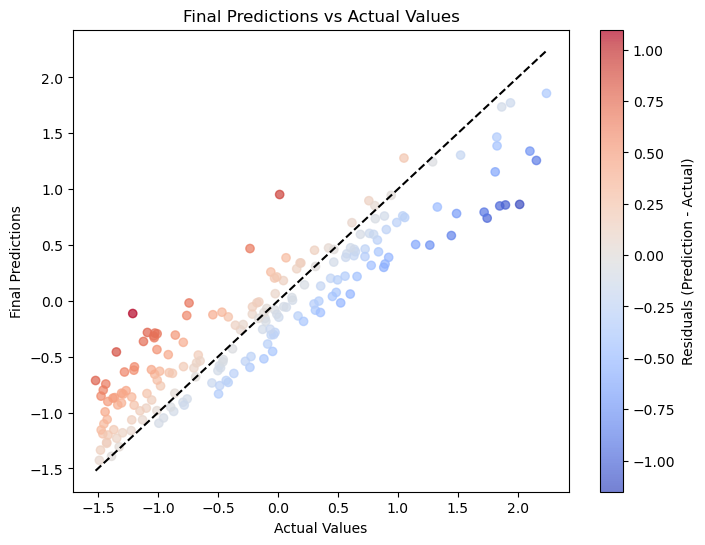

R^2 Score: 0.8223
Mean Absolute Error (MAE): 0.3170
Mean Squared Error (MSE): 0.1633
Root Mean Squared Error (RMSE): 0.4042


In [57]:
# Load target data
Y_train = pd.read_csv('train_target_gB4.csv').squeeze()
Y_val = pd.read_csv('validation_target_gB4.csv').squeeze()
Y_test = pd.read_csv('test_target_gB4.csv').squeeze()

# Load linear regression predictions
lr_pred_df = pd.read_csv('LR_pred_gB4.csv')
lr_pred = lr_pred_df.iloc[:, 0]
lr_residuals = Y_test - lr_pred

# Fit a Random Forest Regressor to predict the residuals
rf_residual = RandomForestRegressor(random_state=42)
rf_residual.fit(lr_pred.values.reshape(-1, 1), lr_residuals)

# Predict residuals using the trained model
predicted_residuals = rf_residual.predict(lr_pred.values.reshape(-1, 1))

# Combine and plot linear regression predictions with predicted residuals as a heatmap of residuals
final_predictions = lr_pred + predicted_residuals
residuals_plot = final_predictions - Y_test

plt.figure(figsize=(8, 6))
sc = plt.scatter(Y_test, final_predictions, c=residuals_plot, cmap='coolwarm', alpha=0.7)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='black', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Final Predictions')
plt.title('Final Predictions vs Actual Values')
plt.colorbar(sc, label='Residuals (Prediction - Actual)')
plt.show()

# Calculate diagnostic metrics
r2 = r2_score(Y_test, final_predictions)
mae = mean_absolute_error(Y_test, final_predictions)
mse = mean_squared_error(Y_test, final_predictions)
rmse = np.sqrt(mse)

print(f"R^2 Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
